In [70]:
# Importando a biblioteca pandas
import pandas as pd

In [71]:
df1 = pd.read_excel('/content/Aracaju.xlsx')
df2 = pd.read_excel('/content/Fortaleza.xlsx')
df3 = pd.read_excel('/content/Natal.xlsx')
df4 = pd.read_excel('/content/Recife.xlsx')
df5 = pd.read_excel('/content/Salvador.xlsx')

In [72]:
# Exibindo as 5 primeiras linhas do arquivo concatenado
df2.head() 

,Cidade,Data,Vendas,LojaID,Qtde
0,Fortaleza,2019-01-01,45.27,1002,2
1,Fortaleza,2019-01-01,115.61,1002,3
2,Fortaleza,2019-02-10,35.33,1004,3
3,Fortaleza,2019-02-10,20.95,1004,6
4,Fortaleza,2019-01-01,14.25,1004,6


In [73]:
# Juntando todos os arquivos do excel
df = pd.concat([df1,df2,df3,df4,df5])

In [74]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [75]:
# Exibindo as 5 primeiras linhas do arquivo concatenado
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [76]:
# Eibindo as 5 ultimas linhas do arquivo concatenado
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [77]:
# Pegando uma amostra de dados do arquivo
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
63,Aracaju,2018-01-01,39.87,1522,5
109,Fortaleza,2019-03-02,18.90,982,6
72,Salvador,2019-01-01,149.47,1036,3
190,Salvador,2019-01-02,78.78,1035,3
30,Salvador,2019-01-01,47.96,1034,2


In [78]:
# Verificando o tipo de dados de cada conluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [79]:
# Auterando o tipo de dado da coluna LojaID
df['LojaID'] = df['LojaID'].astype('object')

In [80]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

**Tratando valores faltantes**

In [81]:
# Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [82]:
# Ver a media de Vendas
df['Vendas'].mean()

122.61180089485438

In [83]:
# Substituindo os valores nulos pela media
# df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [84]:
# Substituir os valores nulos por zero
df['Vendas'].fillna(0, inplace=True)

In [85]:
# Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [86]:
# Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=['Vendas'], inplace=True)

In [87]:
# Apagando as linhas com valores nulos em todas as coluna
df.dropna(how = 'all', inplace = True)

**Criando colunas novas**

In [88]:
# Criando a coluna receita
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [89]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [90]:
# Caso nao tivessemos a coluna 'Qtde' e quisessemos uma
df['Receita/Vendas'] = df['Receita'] / df['Vendas']

In [91]:
df.head()


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [92]:
# Retornar a maior receita
df['Receita'].max()

3544.0

In [93]:
# Retornar a menor receita
df['Receita'].min()

3.34

In [94]:
# nlargest retorna o maiores valores de determinada coluna
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [95]:
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [96]:
# Agrupando por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [97]:
# Ordenando o conjunto de dados
df.sort_values('Receita',ascending=True).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Salvador,2019-01-01,4.57,1035,1,4.57,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0
95,Salvador,2019-01-01,5.13,1035,1,5.13,1.0
95,Natal,2019-01-02,5.13,1035,1,5.13,1.0
161,Salvador,2019-01-02,5.80,1036,1,5.80,1.0
161,Natal,2019-01-02,5.80,1036,1,5.80,1.0
216,Natal,2019-01-02,5.82,1035,1,5.82,1.0
216,Salvador,2019-01-02,5.82,1035,1,5.82,1.0


**Trabalhando com datas**

In [98]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [99]:
# Convertendo a coluna data para tipo int
df['Data'] = df['Data'].astype('int64')

In [100]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [101]:
# Convertendo a coluna Data do tipo int novamente para o formato datetime
df['Data'] = pd.to_datetime(df['Data'])

In [102]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [103]:
# Agrupando a receita por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [104]:
# Criando uma coluna como ano
df['Ano_Vendas'] = df['Data'].dt.year

In [105]:
# Pega uma amostra de linhas aleatorias 
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Vendas
93,Salvador,2019-01-01,15.58,1037,1,15.58,1.0,2019
101,Fortaleza,2019-01-01,11.67,1005,4,46.68,4.0,2019
91,Natal,2019-01-02,17.74,1035,1,17.74,1.0,2019
153,Natal,2019-01-02,17.41,1035,2,34.82,2.0,2019
111,Aracaju,2018-01-01,24.25,1523,1,24.25,1.0,2018


In [106]:
# Extraindo o mes e o dia
df['mes'], df['dia'] = (df['Data'].dt.month, df['Data'].dt.day)

In [107]:
# Pega uma amostra de linhas aleatorias 
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Vendas,mes,dia
52,Aracaju,2018-01-01,14.76,1520,3,44.28,3.0,2018,1,1
43,Recife,2019-01-01,22.29,983,7,156.03,7.0,2019,1,1
203,Salvador,2019-01-02,37.75,1035,2,75.50,2.0,2019,1,2
30,Natal,2018-10-02,856.00,853,4,3424.00,4.0,2018,10,2
21,Salvador,2019-01-01,39.72,1035,3,119.16,3.0,2019,1,1


In [108]:
# Retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [109]:
# Retornando a data mais recente
df['Data'].max()

Timestamp('2019-04-05 00:00:00')

In [110]:
# Criando a culuna trimestre
df['Trimestre'] = df['Data'].dt.quarter

In [111]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Vendas,mes,dia,Trimestre
87,Aracaju,2018-01-01,116.71,1520,4,466.84,4.0,2018,1,1,1
100,Fortaleza,2019-01-01,18.58,1003,1,18.58,1.0,2019,1,1,1
74,Salvador,2019-01-01,170.53,1035,2,341.06,2.0,2019,1,1,1
4,Natal,2019-03-09,699.00,853,3,2097.00,3.0,2019,3,9,1
84,Fortaleza,2019-01-01,147.46,1003,6,884.76,6.0,2019,1,1,1


In [112]:
# Filtrando as vendas de 2019 do mes de marco
ano = df['Data'].dt.year == 2019
mes = df['Data'].dt.month == 3
vendas_marco_19 = df.loc[ano & mes]

In [113]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Vendas,mes,dia,Trimestre
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,1


## **Visualizacao de dados**

In [114]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

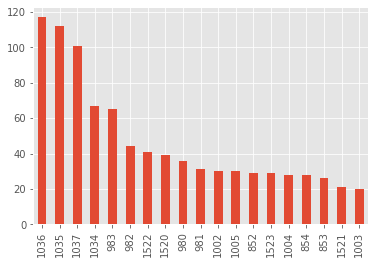

In [115]:
# Grafico de barras
df['LojaID'].value_counts().plot.bar();

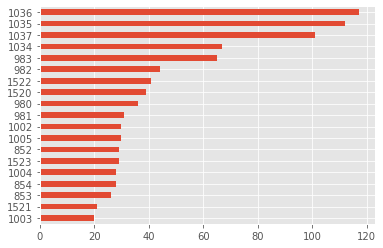

In [116]:
# Grafico de barras hoizontais
df['LojaID'].value_counts(ascending=True).plot.barh();

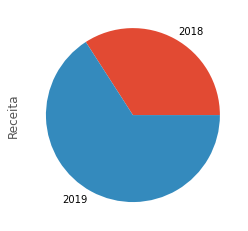

In [117]:
# Grafico de pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [118]:
# Total de vendadas por cidade
df['Cidade'].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

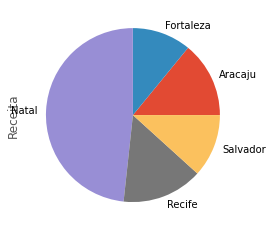

In [125]:
# Total de receita por cidade em gráfico de pizza
df.groupby(['Cidade'])['Receita'].sum().plot.pie();


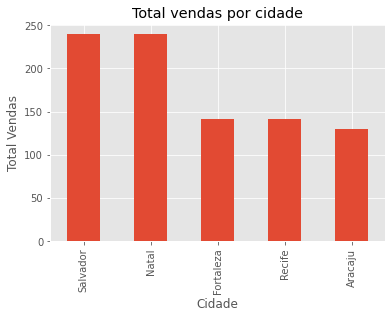

In [126]:
# Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');


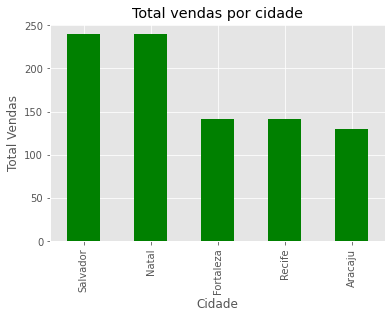

In [127]:
# Alterando a cor do grafico
df['Cidade'].value_counts().plot.bar(title='Total vendas por cidade', color='green')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

In [128]:
# Alterando o estilo do grafico
plt.style.use('ggplot')

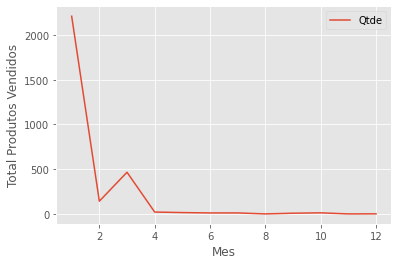

In [129]:
# Gráfico mostrando a quantidade de produtos vendidos em casa mês
df.groupby(df.Data.dt.month)['Qtde'].sum().plot()
plt.xlabel('Mes')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

In [130]:
df.groupby(df.Data.dt.month)['Qtde'].sum()

Data
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

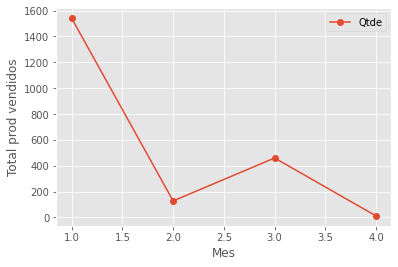

In [131]:
# Gráfico mostrando a quantidade de produtos vendidos em casa mês do ano de 2019
df2019 = df.loc[df.Data.dt.year == 2019]
df2019.groupby(df2019['mes'])['Qtde'].sum().plot(marker = 'o')
plt.xlabel('Mes')
plt.ylabel('Total prod vendidos')
plt.legend();

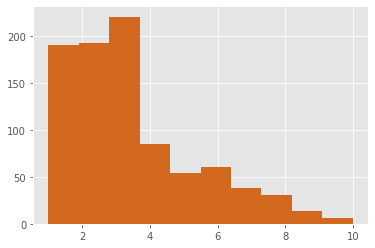

In [132]:
# Histograma
plt.hist(df['Qtde'], color = 'chocolate');

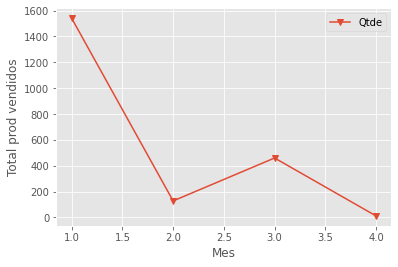

In [133]:
# Salvando as imagens em formato png
df2019.groupby(df2019['mes'])['Qtde'].sum().plot(marker = 'v')
plt.xlabel('Mes')
plt.ylabel('Total prod vendidos')
plt.legend()
plt.savefig('Grafico QTE x MES.png')